#### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Load Auto MPG Dataset

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin","Car Name"]
data = pd.read_csv(url, names=columns, delim_whitespace=True, na_values='?')
# Drop rows with missing values
data = data.dropna()
# Separate features and target
X = data.drop(["MPG", "Car Name"], axis=1)
y = data["MPG"]

In [3]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Step 3: Preprocess the Data

In [4]:
# Convert categorical 'Origin' column using one-hot encoding
X = pd.get_dummies(X, columns=["Origin"], drop_first=True)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Step 4: Build ANN Model

In [5]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#### Step 5: Train the Model

In [6]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 565.6099 - mae: 22.3936 - val_loss: 620.3851 - val_mae: 23.6746
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 520.0696 - mae: 21.3961 - val_loss: 565.3406 - val_mae: 22.5246
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 462.3092 - mae: 20.0271 - val_loss: 490.5319 - val_mae: 20.8603
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 384.0892 - mae: 18.0526 - val_loss: 388.9066 - val_mae: 18.4262
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 283.0238 - mae: 15.2352 - val_loss: 268.6211 - val_mae: 15.0499
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 178.9752 - mae: 11.8326 - val_loss: 148.7219 - val_mae: 10.9940
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.2160 - mae: 8.2144 - val_loss: 71.0328 - val_mae: 7.0443
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.4991 - mae: 5.7181 - val_loss: 43.7281 - val_mae: 5.2664
Epoch 9/100
16/16 ━━━━━

#### Step 6: Evaluate the Model

In [7]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae:.2f} MPG")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6251 - mae: 1.6871
Mean Absolute Error on Test Set: 1.69 MPG


In [8]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


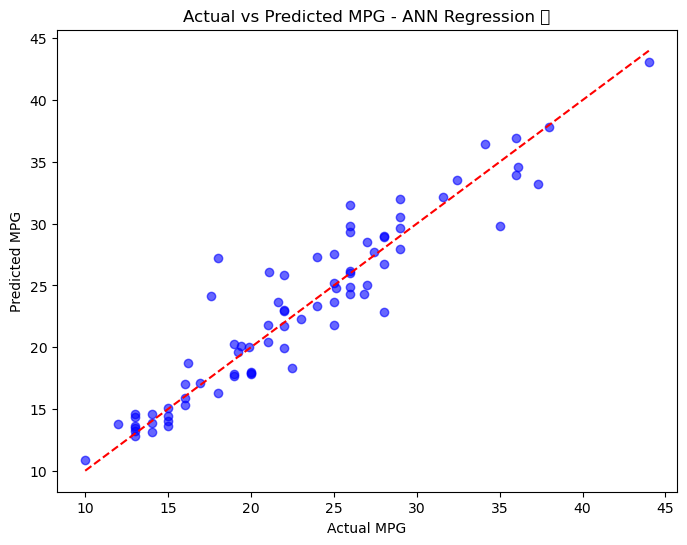

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG - ANN Regression 🚗")
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f} MPG")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Absolute Error (MAE): 1.69 MPG
Mean Squared Error (MSE): 5.63


In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.89
